In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [179]:
# Carregue aqui o dataset
dataset = pd.read_csv("..\data\dataset.csv")
answers = pd.read_csv("..\data\ANSWERS.csv")

## Exploracao de dados

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.nunique()

In [ ]:
dataset.head(10)

<AxesSubplot:>

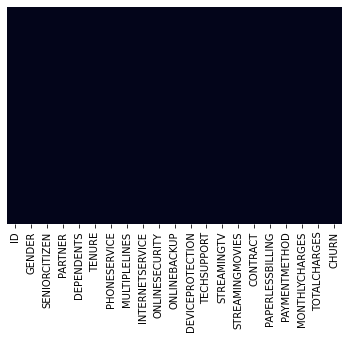

In [131]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

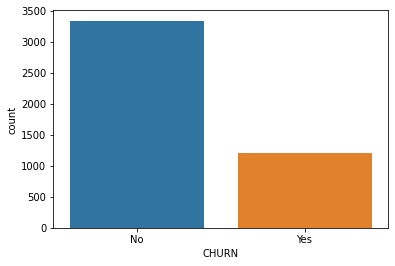

In [113]:
risk_plot = sns.countplot(data=dataset, x='CHURN', order=dataset['CHURN'].value_counts().index)
plt.show()

In [180]:
for item in dataset.columns:
    print(item)
    print (dataset[item].unique())

ID
[3418 6865 2799 ... 7587 4176 5802]
GENDER
['Female' 'Male' nan]
SENIORCITIZEN
[ 0.  1. nan]
PARTNER
['No' 'Yes' nan]
DEPENDENTS
['No' 'Yes' nan]
TENURE
[26. 39.  1. 66. 56.  3. 14. 72. 28. 54.  4. 22. 16. 42. 35. 51. 46. 25.
 23.  2. 24.  8. 71. 50. 20. 69. 15. 27. 62. 13. 55. 31.  7. 61. 58. 18.
 64. 45. 41.  9. 44. 10. 19. 36. 43.  5. 33. 37. 68. 70. 48. 47. 60. 59.
 29. 11. 17. 52. 57. 40. 12. 49. 30. 65. 53. 34. 32. 21.  6. 63. 67. 38.
 nan  0.]
PHONESERVICE
['Yes' 'No' nan]
MULTIPLELINES
['No' 'Yes' 'No phone service' nan]
INTERNETSERVICE
['DSL' 'Fiber optic' 'No' nan]
ONLINESECURITY
['No' 'No internet service' 'Yes' nan]
ONLINEBACKUP
['Yes' 'No' 'No internet service' nan]
DEVICEPROTECTION
['Yes' 'No' 'No internet service' nan]
TECHSUPPORT
['No' 'No internet service' 'Yes' nan]
STREAMINGTV
['No' 'No internet service' 'Yes' nan]
STREAMINGMOVIES
['No' 'No internet service' 'Yes' nan]
CONTRACT
['Month-to-month' 'Two year' 'One year' nan]
PAPERLESSBILLING
['Yes' 'No' nan]
PAYMENTM

## Manipulação dos datasets

In [181]:
dataset = dataset.dropna()

In [182]:
dataset.TOTALCHARGES = dataset.TOTALCHARGES.replace(r'\s+', 0, regex=True)
dataset.TOTALCHARGES = pd.to_numeric(dataset.TOTALCHARGES)

In [183]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
le = LabelEncoder()
cols = ['GENDER', 'PAYMENTMETHOD']
dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)

dataset.SENIORCITIZEN = dataset.SENIORCITIZEN.astype('int')
dataset.PARTNER = dataset.PARTNER.replace({'No':0,'Yes':1})
dataset.DEPENDENTS = dataset.DEPENDENTS.replace({'No':0,'Yes':1})
dataset.PHONESERVICE = dataset.PHONESERVICE.replace({'No':0,'Yes':1})
dataset.MULTIPLELINES = dataset.MULTIPLELINES.replace({'No phone service':0,'No':1,'Yes':2})
dataset.INTERNETSERVICE = dataset.INTERNETSERVICE.replace({'No':0,'DSL':1,'Fiber optic':2})
dataset.ONLINESECURITY = dataset.ONLINESECURITY.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.ONLINEBACKUP = dataset.ONLINEBACKUP.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.DEVICEPROTECTION = dataset.DEVICEPROTECTION.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.TECHSUPPORT = dataset.TECHSUPPORT.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.STREAMINGTV = dataset.STREAMINGTV.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.STREAMINGMOVIES = dataset.STREAMINGMOVIES.replace({'No internet service':0, 'No':0,'Yes':1})
dataset.CONTRACT = dataset.CONTRACT.replace({'Month-to-month':0,'One year':1, 'Two year':2})
dataset.PAPERLESSBILLING = dataset.PAPERLESSBILLING.replace({'No':0,'Yes':1})
dataset.MONTHLYCHARGES = dataset.MONTHLYCHARGES.astype('float')
dataset.TOTALCHARGES = dataset.TOTALCHARGES.astype('float')
dataset.CHURN = dataset.CHURN.replace({'No':0,'Yes':1})

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
ID,1.000000,-0.027839,-0.008728,-0.024926,-0.024167,-0.028442,-2.102897e-02,-0.013549,-0.025721,-0.055889,...,-0.021616,-0.045518,-0.027413,-0.027225,-0.052660,0.017154,0.038567,-0.035313,-0.046690,1.444865e-02
GENDER,-0.027839,1.000000,-0.006554,0.012409,-0.027916,0.016442,8.950690e-03,0.022307,-0.024846,-0.047754,...,-0.001970,-0.023286,-0.039744,-0.004154,0.001154,0.000612,0.038762,-0.006528,0.012703,-9.287970e-03
SENIORCITIZEN,-0.008728,-0.006554,1.000000,0.018576,-0.221755,0.003291,2.329209e-02,0.120240,0.249270,-0.048641,...,0.048233,-0.078865,0.090545,0.102497,-0.144978,0.127988,-0.029520,0.146585,0.085955,1.552396e-01
PARTNER,-0.024926,0.012409,0.018576,1.000000,0.459223,0.401478,9.262911e-03,0.108980,0.009589,0.155165,...,0.174208,0.134564,0.115739,0.133707,0.298263,-0.035949,-0.148825,0.038261,0.361374,-1.670444e-01
DEPENDENTS,-0.024167,-0.027916,-0.221755,0.459223,1.000000,0.189958,-7.685359e-03,-0.033695,-0.181941,0.092546,...,0.026349,0.093518,-0.033979,-0.021714,0.261891,-0.141197,-0.054019,-0.055625,0.089735,-1.916412e-01
TENURE,-0.028442,0.016442,0.003291,0.401478,0.189958,1.000000,7.357727e-03,0.262242,-0.008368,0.340490,...,0.353784,0.324567,0.242239,0.271402,0.690196,-0.026232,-0.380938,0.129465,0.861796,-4.049691e-01
PHONESERVICE,-0.021029,0.008951,0.023292,0.009263,-0.007685,0.007358,1.000000e+00,0.650548,0.149756,-0.061556,...,-0.041107,-0.074939,-0.020862,-0.023686,-0.009434,0.060945,0.000360,0.161342,0.107441,8.517809e-16
MULTIPLELINES,-0.013549,0.022307,0.120240,0.108980,-0.033695,0.262242,6.505481e-01,1.000000,0.349719,0.046420,...,0.134410,0.040876,0.181528,0.216150,0.062262,0.170737,-0.128097,0.306850,0.414320,2.366807e-02
INTERNETSERVICE,-0.025721,-0.024846,0.249270,0.009589,-0.181941,-0.008368,1.497563e-01,0.349719,1.000000,0.074585,...,0.254620,0.094660,0.392858,0.404770,-0.302347,0.375441,-0.088304,0.492172,0.335815,3.477126e-01
ONLINESECURITY,-0.055889,-0.047754,-0.048641,0.155165,0.092546,0.340490,-6.155589e-02,0.046420,0.074585,1.000000,...,0.229024,0.330231,0.137993,0.130362,0.282020,-0.049617,-0.195867,0.119248,0.384702,-2.123505e-01


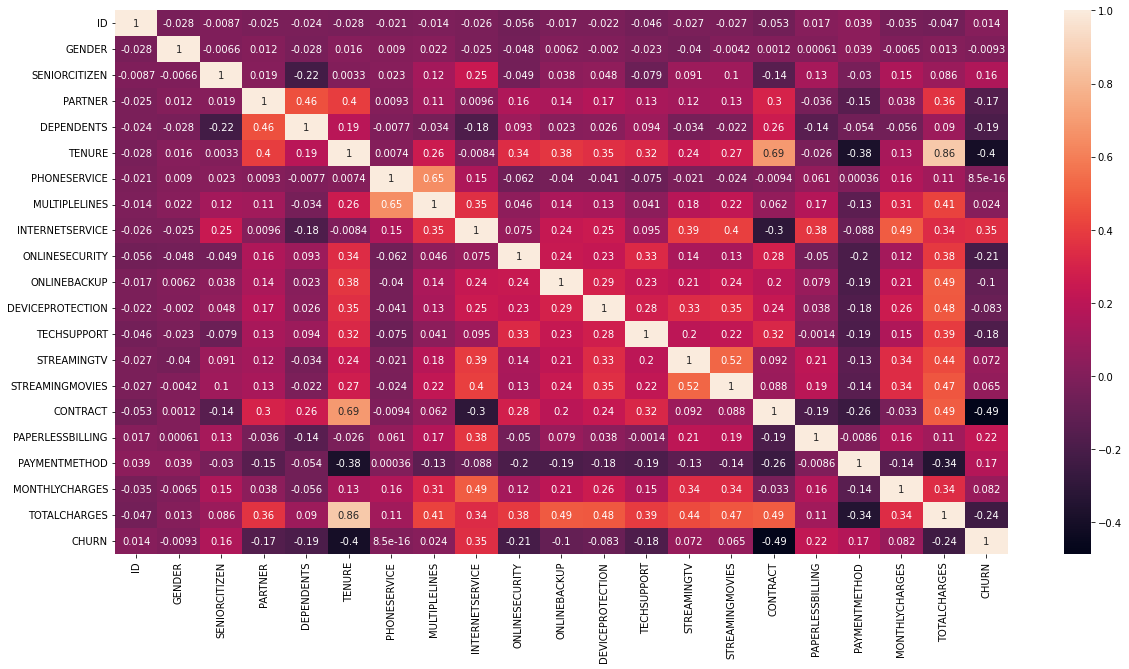

In [184]:
churners_count = len(dataset[dataset['CHURN'] == 1])
churners = (dataset[dataset['CHURN'] == 1])
non_churners = dataset[dataset['CHURN'] == 0].sample(n=churners_count)
df2 = churners.append(non_churners)

def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

show_correlations(df2,show_chart=True)

In [ ]:
catvars = dataset.columns.tolist()
catvars = [e for e in catvars if e not in ('TOTALCHARGES', 'MONTHLYCHARGES', 
                                           'TENURE', 'ID', 'CHURN')]

y = 'CHURN'
for x in catvars:
    plot = dataset.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

In [168]:
object_columns = ['ID']
# object_columns = ['ID', 'TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']
dataset = dataset.drop(object_columns, axis=1)

### Feature selection

In [180]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=17, step=1)
rfe = rfe.fit(X_train, Y_train)
print('Chosen best features by rfe:',X_train.columns[rfe.support_])

Chosen best features by rfe: Index(['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n', 'SEX_M',
       'AGE_n', 'JOB_TYPE_n', 'TELEPHONE_n', 'EMPLOYMENT_DURATION_n',
       'CURRENT_RESIDENCE_DURATION_n', 'CHECKING_BALANCE_n2',
       'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
       'OTHERS_ON_LOAN_n_NONE', 'PROPERTY_n_CAR_OTHER',
       'PROPERTY_n_REAL_ESTATE', 'PROPERTY_n_SAVINGS_INSURANCE',
       'HOUSING_n_OWN'],
      dtype='object')


Accuracy is:  0.7899659863945578


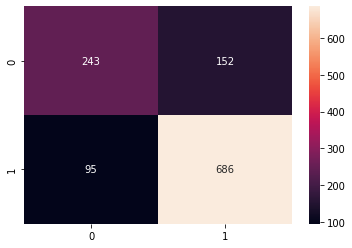

In [181]:
xtrain_5features = X_train[X_train.columns[rfe.support_]]
X_test_5features = X_test[X_train.columns[rfe.support_]]
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(xtrain_5features,Y_train)
ac = accuracy_score(Y_test,clf_rf.predict(X_test_5features))
print('Accuracy is: ',ac)
cm = confusion_matrix(Y_test,clf_rf.predict(X_test_5features))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [182]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, Y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


Optimal number of features : 32
Best features : Index(['PAYMENT_TERM_n', 'INSTALLMENT_PERCENT_n', 'LOAN_AMOUNT_n', 'SEX_F',
       'SEX_M', 'AGE_n', 'JOB_TYPE_n', 'DEPENDENTS_n', 'TELEPHONE_n',
       'EMPLOYMENT_DURATION_n', 'CURRENT_RESIDENCE_DURATION_n',
       'CHECKING_BALANCE_n2', 'EXISTING_SAVINGS_n', 'EXISTING_CREDITS_COUNT_n',
       'INSTALLMENT_PLANS_n_BANK', 'INSTALLMENT_PLANS_n_NONE',
       'INSTALLMENT_PLANS_n_STORES', 'LOAN_PURPOSE_n_APPLIANCES',
       'LOAN_PURPOSE_n_CAR_NEW', 'LOAN_PURPOSE_n_CAR_USED',
       'LOAN_PURPOSE_n_FURNITURE', 'LOAN_PURPOSE_n_RADIO_TV',
       'OTHERS_ON_LOAN_n_NONE', 'PROPERTY_n_CAR_OTHER',
       'PROPERTY_n_REAL_ESTATE', 'PROPERTY_n_SAVINGS_INSURANCE',
       'PROPERTY_n_UNKNOWN', 'HOUSING_n_FREE', 'HOUSING_n_OWN',
       'HOUSING_n_RENT', 'CREDIT_HISTORY_n_CREDITS_PAID_TO_DATE',
       'CREDIT_HISTORY_n_PRIOR_PAYMENTS_DELAYED'],
      dtype='object')


C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


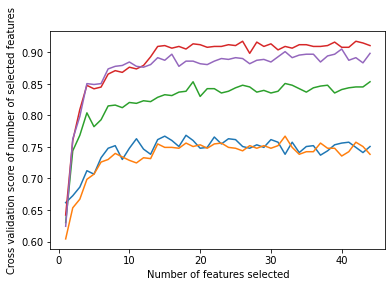

In [183]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [184]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,Y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5 (0.100215)
2. feature 11 (0.097144)
3. feature 0 (0.092621)
4. feature 2 (0.089245)
5. feature 10 (0.077441)
6. feature 1 (0.055099)
7. feature 33 (0.041279)
8. feature 13 (0.038139)
9. feature 31 (0.035715)
10. feature 12 (0.033498)
11. feature 34 (0.031163)
12. feature 14 (0.025835)
13. feature 6 (0.023270)
14. feature 4 (0.021966)
15. feature 37 (0.019691)
16. feature 38 (0.016547)
17. feature 8 (0.016525)
18. feature 32 (0.016096)
19. feature 3 (0.013248)
20. feature 17 (0.011260)
21. feature 21 (0.010876)
22. feature 23 (0.010469)
23. feature 25 (0.009517)
24. feature 35 (0.009440)
25. feature 40 (0.009392)
26. feature 20 (0.009277)
27. feature 43 (0.008396)
28. feature 16 (0.008371)
29. feature 7 (0.008188)
30. feature 18 (0.006849)
31. feature 36 (0.006527)
32. feature 15 (0.006374)
33. feature 29 (0.005661)
34. feature 42 (0.005520)
35. feature 19 (0.005014)
36. feature 39 (0.004108)
37. feature 26 (0.003971)
38. feature 27 (0.003479)
39. feature 2

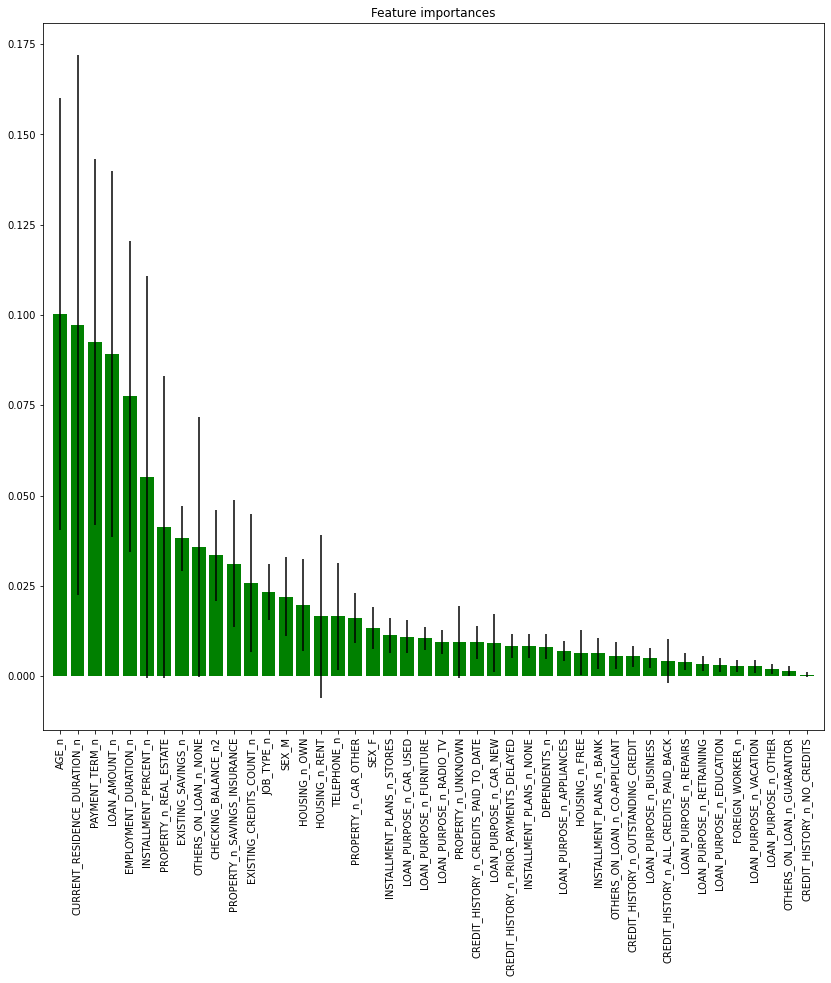

In [185]:
# Plot the feature importances of the forest
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],  color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0, 0.5, 'Variance Ratio Explained')

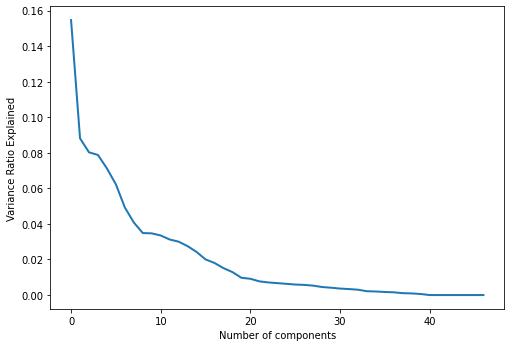

In [87]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)
plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Variance Ratio Explained')

## Criação do modelo

In [161]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.svm import SVC
from plotly.subplots import make_subplots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [201]:
target = ['CHURN']
y = dataset[target]
X = dataset.drop(target, axis=1)
y = np.ravel(y)

In [200]:
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, random_state=42, stratify=y)

KNeighborsClassifier
0.722 
 - - - - -  

0.733 
 - - - - -  

              precision    recall  f1-score   support

    No Churn       0.78      0.87      0.82       909
       Churn       0.45      0.30      0.36       323

    accuracy                           0.72      1232
   macro avg       0.62      0.59      0.59      1232
weighted avg       0.69      0.72      0.70      1232

DecisionTreeClassifier
0.792 
 - - - - -  

0.795 
 - - - - -  

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86       909
       Churn       0.63      0.50      0.56       323

    accuracy                           0.79      1232
   macro avg       0.73      0.70      0.71      1232
weighted avg       0.78      0.79      0.78      1232



<AxesSubplot:ylabel='features'>

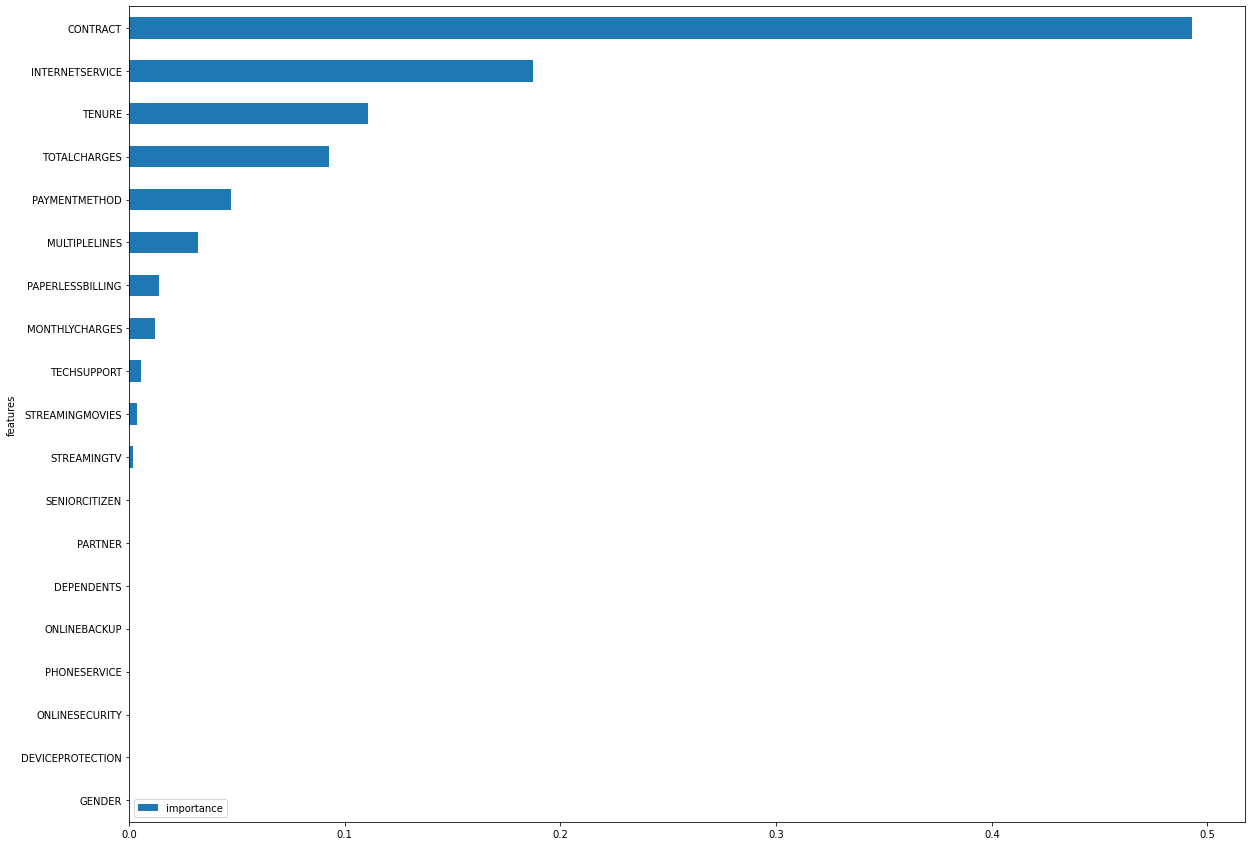

In [166]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
    # Cross Validation
    cv_results = cross_val_score(clf, X, y, cv=10)
    print (round(np.mean(cv_results),3),"\n", "- - - - - ", "\n")
    
    labels = ['No Churn', 'Churn']
    print(classification_report(y_test, pred, target_names=labels))
    
feature_df = pd.DataFrame()
feature_df['features'] = X.columns
feature_df['importance'] = clf.feature_importances_
feature_df.set_index('features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))
print(feature_df.sort_values(by='importance', ascending=True))

In [171]:
from imblearn.over_sampling import SMOTE as Smote
smt = Smote(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [172]:
# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='auto',
#                             random_state=42, n_jobs=11, criterion='entropy', max_depth=22)

model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features="log2",
                            random_state=42, n_jobs=11, criterion='entropy')

# model = LogisticRegression(solver='lbfgs', max_iter=4000)

# model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.7694805194805194


In [173]:
from sklearn.model_selection import cross_val_score
acc_cv = cross_val_score(model,X_train, y_train,cv=10)
print(f"Acurácia do modelo (com cross validate): {acc_cv.mean()}")

Acurácia do modelo (com cross validate): 0.834433962264151


Accuracy score = 0.7694805194805194
Mean absolute error = 0.2305194805194805


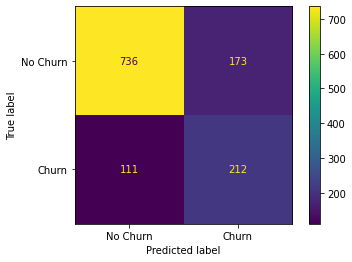

              precision    recall  f1-score   support

    No Churn       0.87      0.81      0.84       909
       Churn       0.55      0.66      0.60       323

    accuracy                           0.77      1232
   macro avg       0.71      0.73      0.72      1232
weighted avg       0.79      0.77      0.78      1232



In [175]:
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, predictions)}')

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ['No Churn', 'Churn']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

In [191]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,X_train,y_train,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,X_train,y_train,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,X_train,y_train,cv=5,scoring='f1')

In [192]:
fig = make_subplots(rows=3, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Adaboost Cross Val Scores',
                                                                    'SVM Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Random Forest'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=list(range(0,len(ada_f1_cross_val_scores))),y=ada_f1_cross_val_scores,name='Adaboost'),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x=list(range(0,len(svm_f1_cross_val_scores))),y=svm_f1_cross_val_scores,name='SVM'),
    row=3, col=1)
    

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

In [193]:
rf_pipe.fit(X_train,y_train)
rf_prediction = rf_pipe.predict(X_test)

ada_pipe.fit(X_train,y_train)
ada_prediction = ada_pipe.predict(X_test)

svm_pipe.fit(X_train,y_train)
svm_prediction = svm_pipe.predict(X_test)

In [194]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>F1 Score On Test Data<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>AdaBoost<b>','<b>SVM<b>'], [np.round(f1(rf_prediction,y_test),2), 
                                                                          np.round(f1(ada_prediction,y_test),2),
                                                                          np.round(f1(svm_prediction,y_test),2)]]))
                     ])

fig.update_layout(title='Model Results On Test Data')
fig.show()

https://tylerburleigh.com/blog/predicting-customer-churn-telco-customer-churn/

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
le = LabelEncoder()

In [202]:
target = ['CHURN']
y = dataset[target]
X = dataset.drop(target, axis=1)
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, random_state=42, stratify=y)

In [204]:
catvars = X_train.columns.tolist()
catvars = [e for e in catvars if e not in ('TOTALCHARGES', 'MONTHLYCHARGES', 
                                           'TENURE', 'ID')]

for x in catvars:
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])
    
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

X_train = X_train.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)

Model 1 - Kitchen sink

In [214]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(10, 50, num = 5)],
               'max_features': ['auto','sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 50, num = 10)],
               'min_samples_split': [int(x) for x in np.linspace(2, 11, num = 9)],
               'min_samples_leaf': [int(x) for x in np.linspace(2, 11, num = 9)],
               'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter=500, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               scoring='accuracy',
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 11],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 11],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, scoring='accuracy', verbose=2)

In [215]:
rf_random.best_score_

0.8057240406367652

In [216]:
pred = rf_random.predict(X_test)
errors = abs(pred - y_test)
1 - (sum(errors) / len(X_test.index))

0.7944038929440389

Accuracy score = 0.7944038929440389
Mean absolute error = 0.20559610705596107


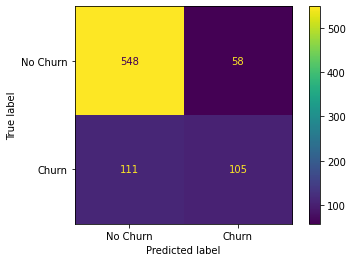

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87       606
       Churn       0.64      0.49      0.55       216

    accuracy                           0.79       822
   macro avg       0.74      0.70      0.71       822
weighted avg       0.78      0.79      0.78       822



In [217]:
# Estimativa da acurácia no conjunto de teste
print(f'Accuracy score = {accuracy_score(y_test, pred)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, pred)}')

# Matriz de confusão
cm = confusion_matrix(y_test, pred)
labels = ['No Churn', 'Churn']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, pred, target_names=labels))

Model 2 - Reduce feature level redundancy

In [210]:
df_recode = dataset
int_vars = ['ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 
            'TECHSUPPORT', 'STREAMINGTV', 'STREAMINGMOVIES']

for x in int_vars:
    df_recode.loc[df_recode[x] == 'No internet service', x] = 'No'
    
X_train, X_test, y_train, y_test = train_test_split(df_recode, 
                                                    dataset.CHURN, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=dataset.CHURN)

catvars = X_train.columns.tolist()
catvars = [e for e in catvars if e not in ('TOTALCHARGES', 'MONTHLYCHARGES', 
                                           'TENURE', 'ID')]
for x in catvars:
    X_train[x] = le.fit_transform(X_train[x])
    X_test[x] = le.fit_transform(X_test[x])
    
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

X_train = X_train.drop(['CHURN', 'ID'], axis=1)
X_test = X_test.drop(['CHURN', 'ID'], axis=1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 11],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 11],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, scoring='accuracy', verbose=2)

In [211]:
pred = rf_random.predict(X_test)
errors = abs(pred - y_test)
1 - (sum(errors) / len(X_test.index))

0.7895377128953771

Accuracy score = 0.7895377128953771
Mean absolute error = 0.21046228710462286


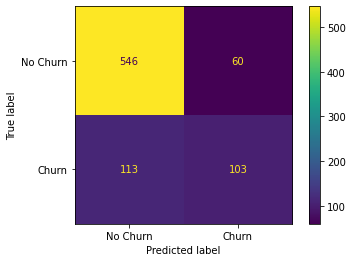

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86       606
       Churn       0.63      0.48      0.54       216

    accuracy                           0.79       822
   macro avg       0.73      0.69      0.70       822
weighted avg       0.78      0.79      0.78       822



In [213]:
# Estimativa da acurácia no conjunto de teste
print(f'Accuracy score = {accuracy_score(y_test, pred)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, pred)}')

# Matriz de confusão
cm = confusion_matrix(y_test, pred)
labels = ['No Churn', 'Churn']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, pred, target_names=labels))

### Geração do resultado
É preciso rodar tudo de novo, trocando:
clean_df = result.copy()

In [ ]:
y_result = model.predict(X)
np.bincount(y_result)
final = result.copy()
final['ALLOW'] = y_result
final.to_csv('final.csv', index=False)